In [2]:
%run data_package_loading.py # Code loads data as well as packages that are relevant across most project phases
%matplotlib inline

uci_features = ['28',  '48',  '64', '105', '128', '153', '241', '281', '318', '336', 
                '338', '378', '433', '442', '451', '453', '455', '472', '475', '493']

madelon_features = ['feat_257', 'feat_269', 'feat_308', 'feat_315', 'feat_336',
                   'feat_341', 'feat_395', 'feat_504', 'feat_526', 'feat_639',
                   'feat_681', 'feat_701', 'feat_724', 'feat_736', 'feat_769',
                   'feat_808', 'feat_829', 'feat_867', 'feat_920', 'feat_956']

Xuci_1 = Xuci_1[uci_features]
Xuci_2 = Xuci_2[uci_features]
Xuci_3 = Xuci_3[uci_features]

Xdb_1 = Xdb_1[madelon_features]
Xdb_2 = Xdb_2[madelon_features]
Xdb_3 = Xdb_3[madelon_features]

In [6]:
Xuci_1.shape, Xuci_2.shape, Xuci_3.shape

((440, 20), (440, 20), (440, 20))

In [7]:
Xdb_1.shape, Xdb_2.shape, Xdb_3.shape

((1980, 20), (2053, 20), (1982, 20))

# KDEs

In [44]:
def overlayed_kde(df1, df2, df3):
    fig = plt.figure(figsize=(15,12))
    
    for i, col in enumerate(df1.columns):
        fig.add_subplot(4,5,i+1)
#         df[col].hist(bins=30)
        sns.kdeplot(df1[col], label = 'df1', gridsize=50, alpha=0.5, bw = 'silverman')
        sns.kdeplot(df2[col], label = 'df2', gridsize=50, alpha=0.5, bw = 'silverman')
        sns.kdeplot(df3[col], label = 'df3', gridsize=50, alpha=0.5, bw = 'silverman')
        plt.title(col, y=0.05)
        
    plt.tight_layout()

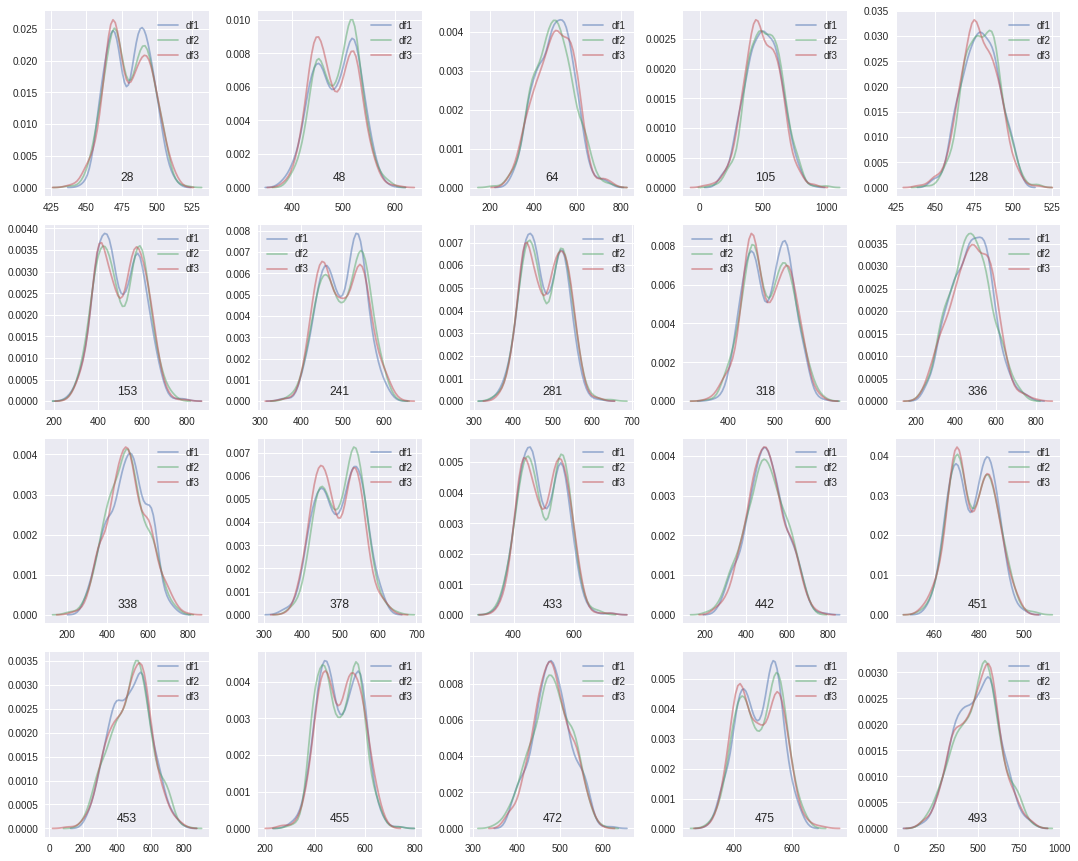

In [45]:
overlayed_kde(Xuci_1, Xuci_2, Xuci_3)

### Thoughts
Some features appear to be bimodal. Since the target classification is binary, I suspect that these features are more likely to be the 'true' features.

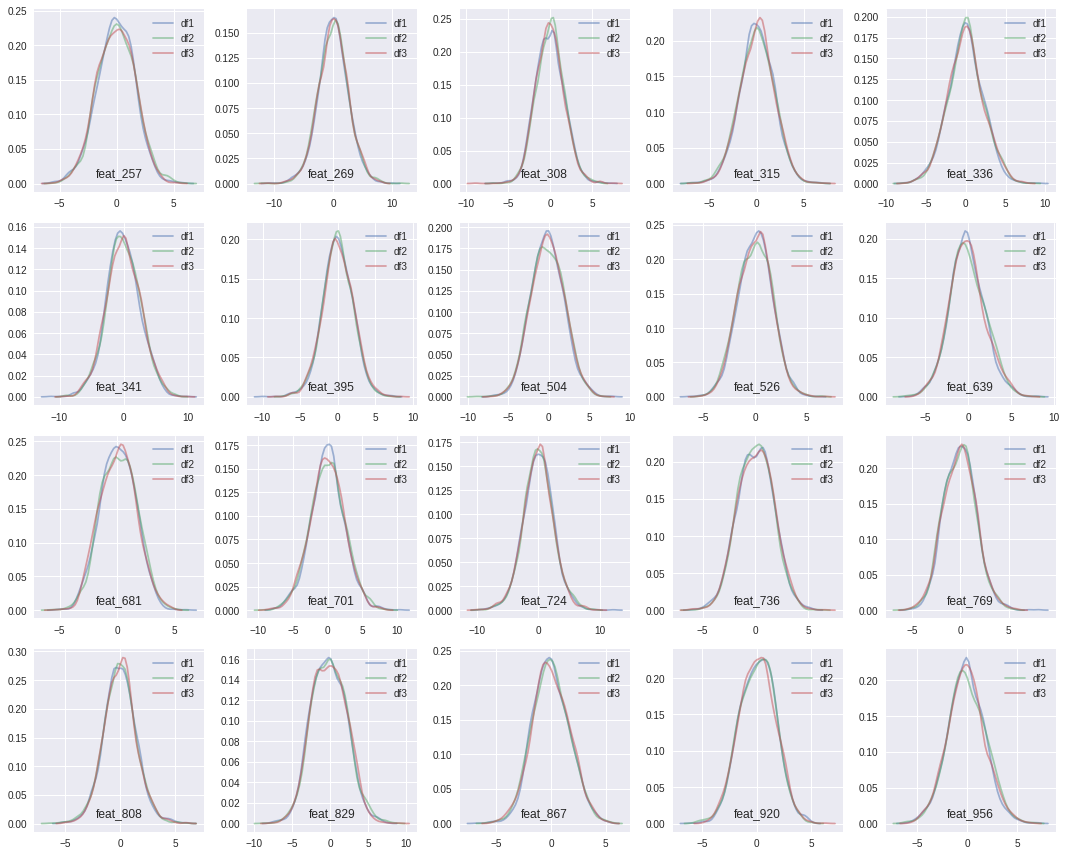

In [46]:
overlayed_kde(Xdb_1, Xdb_2, Xdb_3)

### Thoughts
Bimodal distributions aren't apparent with the DB data. It may not be possible to visually identify likely 'true' features this way

# Histograms
I am not sure this will give us anything better than the KDEs.

In [51]:
def make_hists(df1, df2, df3):
    fig = plt.figure(figsize=(15,12))
    
    for i, col in enumerate(df1.columns):
        fig.add_subplot(4,5,i+1)
#         df[col].hist(bins=30)
        plt.hist(df1[col], label = 'df1', bins=35, alpha=0.5)
        plt.hist(df2[col], label = 'df2', bins=35, alpha=0.5)
        plt.hist(df3[col], label = 'df3', bins=35, alpha=0.5)
        plt.legend()
        plt.title(col, y=0.05)
        
    plt.tight_layout()

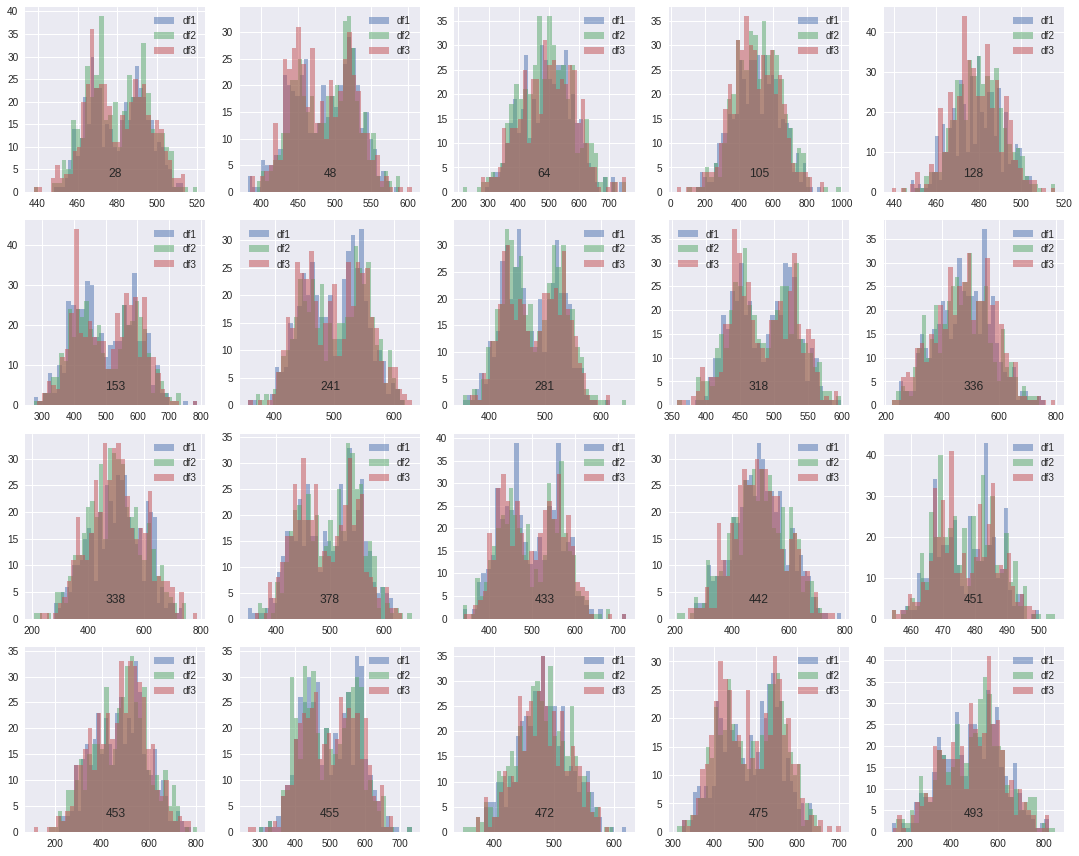

In [52]:
make_hists(Xuci_1, Xuci_2, Xuci_3)

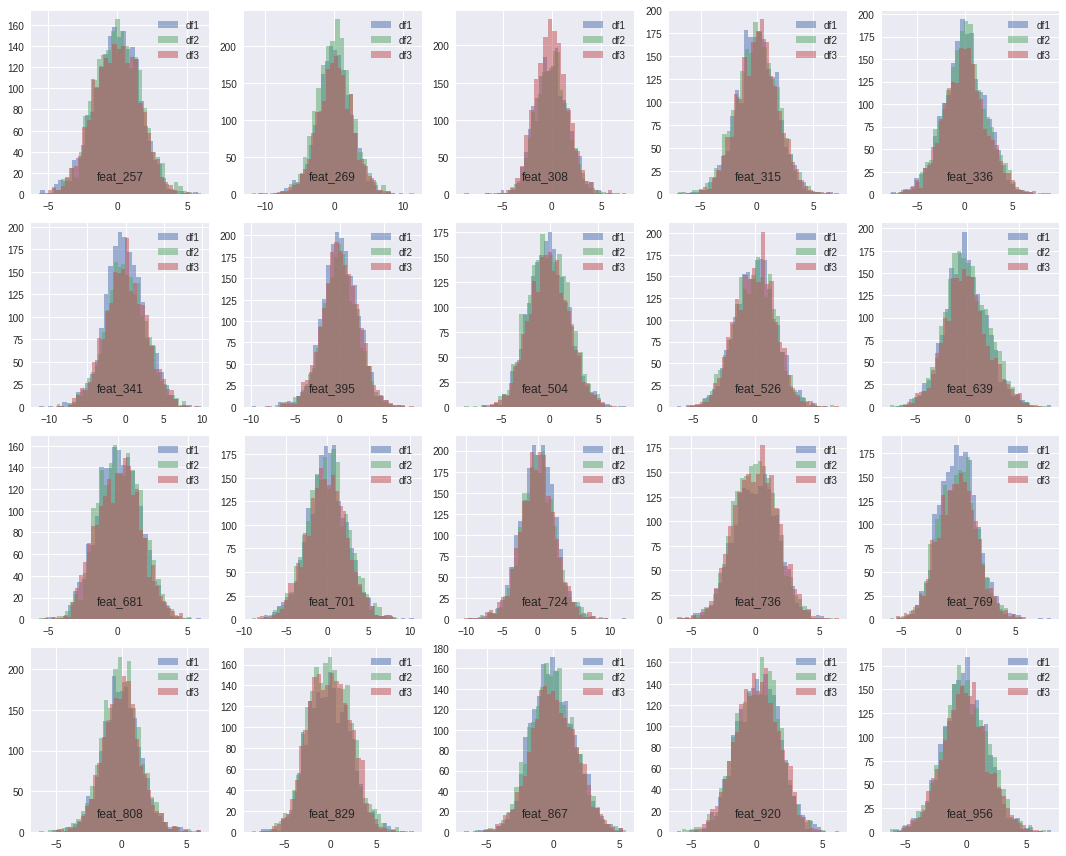

In [53]:
make_hists(Xdb_1, Xdb_2, Xdb_3)

### Thoughts
Results, unsurprisingly, are in line with the KDE plots.

# Violin plots by Target

In [70]:
def make_boxplots(X1, X2, X3, y1, y2, y3):
    fig = plt.figure(figsize=(15,12))
    
    for i, col in enumerate(X1.columns):
        fig.add_subplot(4,5,i+1)
#         df[col].hist(bins=30)
        sns.violinplot(y=X1[col], x=y1, alpha = 0.1, saturation=0.2)
        sns.violinplot(y=X2[col], x=y2, alpha = 0.1, saturation=0.5)
        sns.violinplot(y=X3[col], x=y3, alpha = 0.1, saturation=0.8)

        plt.title(col, y=0.95)
        
    plt.tight_layout()

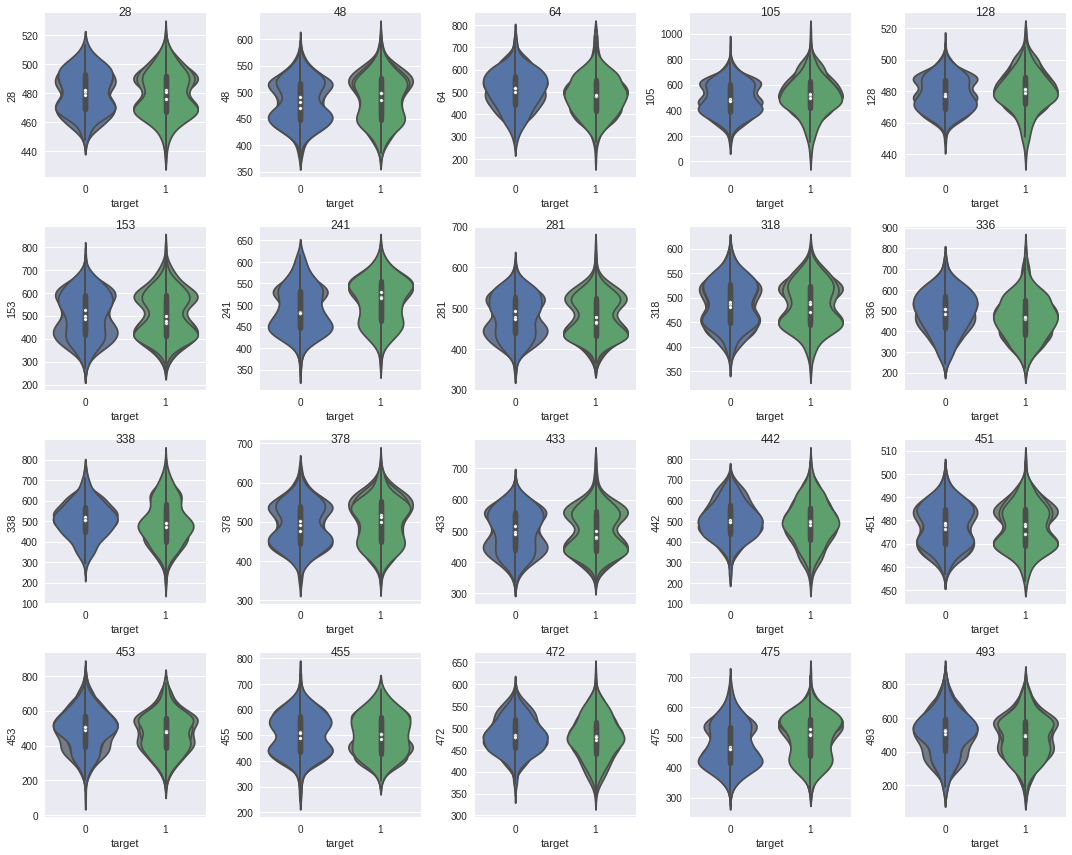

In [71]:
make_boxplots(Xuci_1, Xuci_2, Xuci_3, yuci_1, yuci_2, yuci_3)

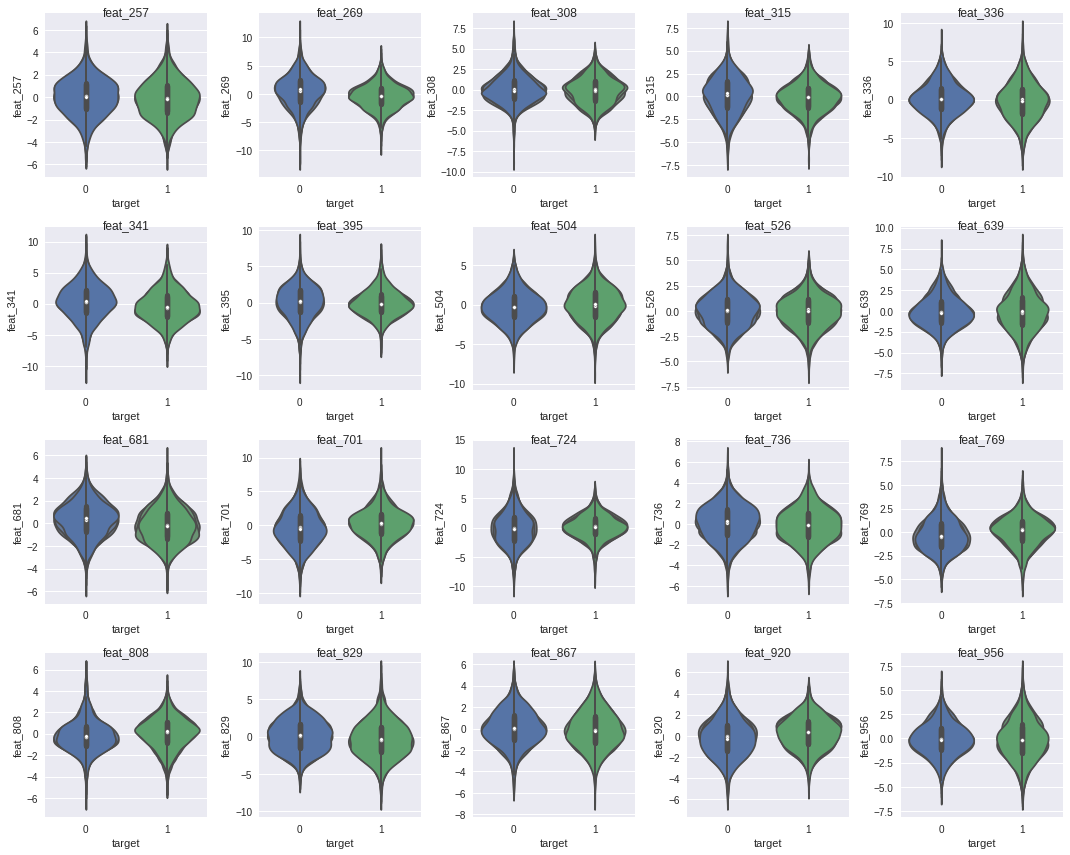

In [72]:
make_boxplots(Xdb_1, Xdb_2, Xdb_3, ydb_1, ydb_2, ydb_3)

### Thoughts
Still seeing some bimodal distributions in the UCI data but not in the DB data.

# Heatmaps

In [86]:
def make_heat(df):
    corr_df = abs(df.corr())
    
    mask = np.zeros_like(corr_df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    fig = plt.figure(figsize = (9,8))
    sns.heatmap(corr_df, mask = mask)
    plt.show()


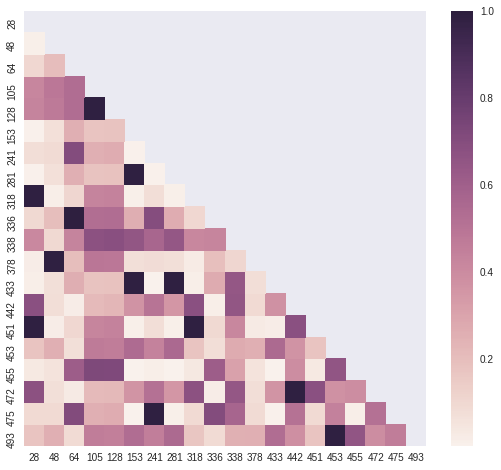

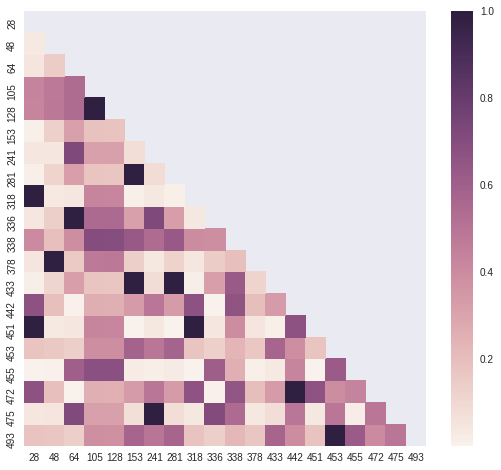

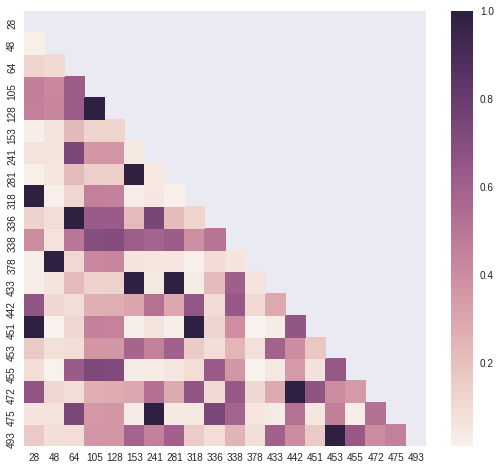

In [88]:
make_heat(Xuci_1)
make_heat(Xuci_2)
make_heat(Xuci_3)

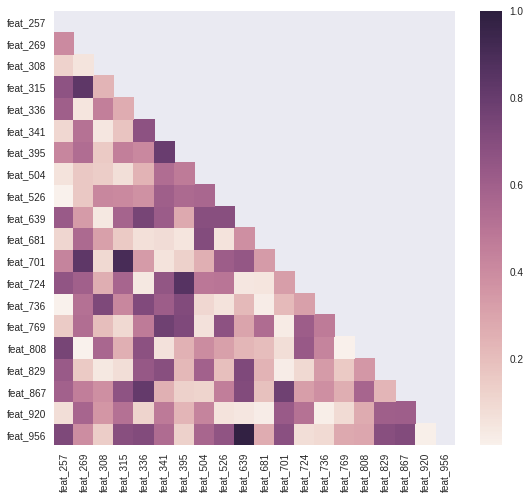

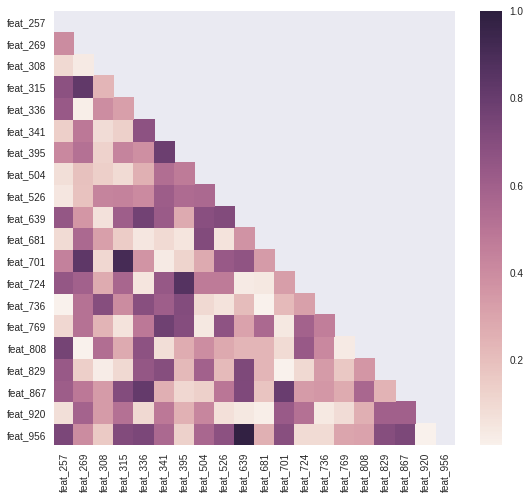

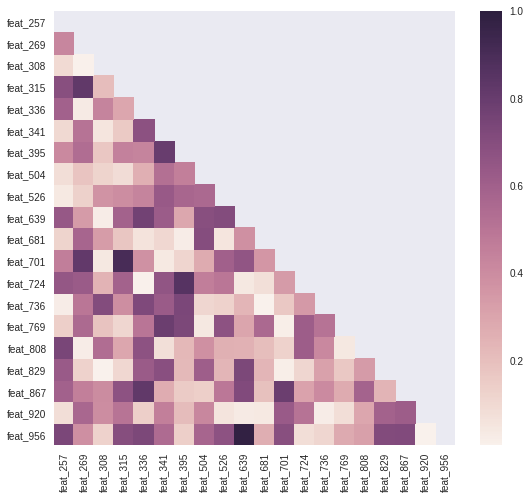

In [89]:
make_heat(Xdb_1)
make_heat(Xdb_2)
make_heat(Xdb_3)